In [1]:
import zarr
import fsspec
import allel
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pathlib import Path
import gcsfs

In [3]:
snp_genotypes_path = 'gs://amin_release/v1.0.1/snp_genotypes'
snp_genotypes_store = fsspec.get_mapper(snp_genotypes_path)
snp_genotypes = zarr.open(snp_genotypes_store, mode='r')
# snp_genotypes = zarr.open_consolidated(snp_genotypes_store)

In [4]:
# ace1 
# ID 
# AMIN000542 
# SuperContig KB663832: 8,786,039-8,873,899 forward strand. 
# 8,786,039 
# 8,873,899 

# Rdl 
# ID 
# AMIN015765 
# SuperContig KB663721: 7,864,151-7,923,308 reverse strand. 
# 7,864,151 
# 7,923,308 

# Gste2 
# ID 
# AMIN016016 
# SuperContig KB664266: 7,514,490-7,515,529 reverse strand. 
# 7,514,490 
# 7,515,529 


In [5]:
contig = 'KB663721'

In [6]:
x = snp_genotypes[contig]['variants/POS']
x

<zarr.core.Array '/KB663721/variants/POS' (20762843,) int32 read-only>

In [7]:
x.info

Name,/KB663721/variants/POS
Type,zarr.core.Array
Data type,int32
Shape,"(20762843,)"
Chunk shape,"(524288,)"
Order,C
Read-only,True
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,fsspec.mapping.FSMap
No. bytes,83051372 (79.2M)
Chunks initialized,40/40


In [8]:
ref = snp_genotypes[contig]['variants/REF'][:]
ref

array([b'A', b'T', b'T', ..., b'C', b'C', b'G'], dtype='|S1')

In [9]:
alt = snp_genotypes[contig]['variants/ALT'][:]
alt

array([[b'C', b'G', b'T'],
       [b'C', b'A', b'G'],
       [b'C', b'A', b'G'],
       ...,
       [b'A', b'G', b'T'],
       [b'A', b'G', b'T'],
       [b'C', b'A', b'T']], dtype='|S1')

In [10]:
np.unique(ref)

array([b'A', b'C', b'G', b'T'], dtype='|S1')

In [11]:
np.unique(alt)

array([b'A', b'C', b'G', b'T'], dtype='|S1')

In [12]:
np.bincount(ref.view('u1'))

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0, 5918804,       0, 4470321,       0,       0,
             0, 4466658,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
       5907060])

In [13]:
np.bincount(alt.view('u1').flatten())

array([       0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0, 14844039,
              0, 16292522,        0,        0,        0, 16296185,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
       14855783])

In [14]:
pos_release = snp_genotypes[contig]['variants/POS'][:]
pos_release

array([       1,        2,        3, ..., 21277814, 21277815, 21277816],
      dtype=int32)

In [15]:
np.count_nonzero(pos_release == 0)

0

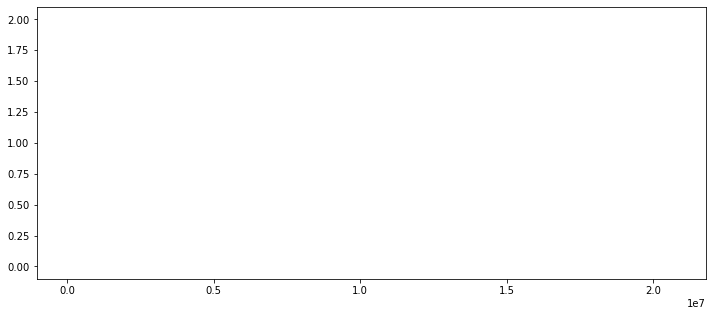

In [17]:
fig, ax = plt.subplots(facecolor='w', figsize=(12, 5))
x = np.arange(pos_release.shape[0])
ax.fill_between(x, 0, pos_release == 0)
ax.fill_between(x, 1, (ref == b'') + 1)
ax.fill_between(x, 2, (alt[:, 0] == b'') + 2);

In [18]:
gcsfs.core.client_config['installed']['client_id'] = '160816776314-7h1p2h6bqhe77vs1su4rr22fblso9dre.apps.googleusercontent.com'
gcsfs.core.client_config['installed']['client_secret'] = 'SrJUwD58yKgViyJtw-NP2sz8'

In [19]:
# gcs_browser = gcsfs.GCSFileSystem(project='malariagen-jupyterhub', token='browser')
# gcs_browser.ls('amin_production') 

In [20]:
# create a GCSFileSystem just for the purpose of authentication
gcs_orig = gcsfs.GCSFileSystem(project='malariagen-jupyterhub', token='cache', cache_timeout=0)

# create another one with those credentials
gcs =  gcsfs.GCSFileSystem(project='malariagen-jupyterhub', token=gcs_orig.session.credentials, cache_timeout=0)

In [25]:
allsites_zarr_path = prod_bucket / 'resources' / 'aminm1.allsites.nonN.zarr'
store_allsites_zarr = gcsfs.mapping.GCSMap(allsites_zarr_path.as_posix(), gcs=gcs, check=False, create=False)
allsites_zarr = zarr.group(store=store_allsites_zarr)

In [26]:
pos_prod = allsites_zarr[contig]['variants/POS'][:]
pos_prod

array([       1,        2,        3, ..., 21277814, 21277815, 21277816],
      dtype=int32)

In [27]:
pos_release.shape, pos_prod.shape

((20762843,), (20762843,))

In [28]:
np.all(pos_release == pos_prod)

True